In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
# dogs vs. cats
dogdata_w_mat = io.loadmat(os.path.join('..','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..','DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

train = np.concatenate((dog_wave[:,:60],cat_wave[:,:60]),axis=1)
test = np.concatenate((dog_wave[:,60:80],cat_wave[:,60:80]),axis=1)
label = np.repeat(np.array([1,-1]),60)

print(np.shape(train))

A = label @ np.linalg.pinv(train)

print(np.shape(A))

test_labels = A@test

(1024, 120)
(1024,)


In [3]:
lasso = linear_model.Lasso().fit(train.T,label)
A_lasso = lasso.coef_
test_labels_lasso = np.sign(A_lasso@test)

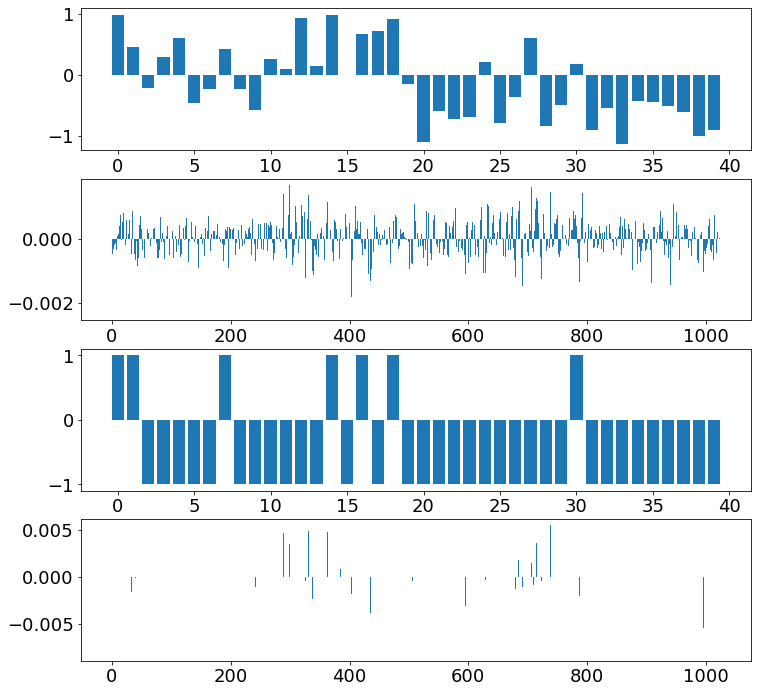

In [4]:
fig,axs = plt.subplots(4,1)
axs[0].bar(range(len(test_labels)),test_labels)
axs[1].bar(range(len(A)),A)
axs[2].bar(range(len(test_labels_lasso)),test_labels_lasso)
axs[3].bar(range(len(A_lasso)),A_lasso)


plt.show()

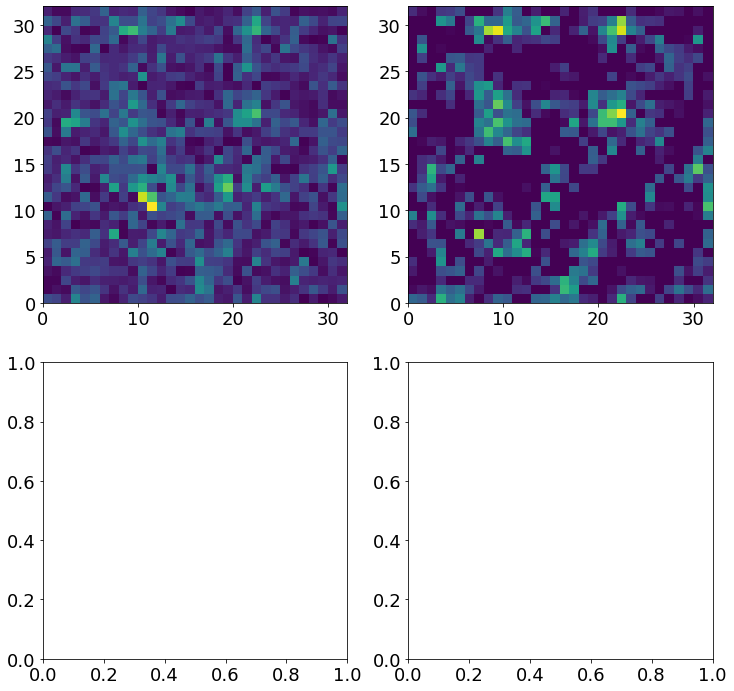

In [5]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
A3=[a if a>np.mean(A) else 0 for a in A]
A2 = np.flipud(np.reshape(A,(32,32)))
Ae = np.flipud(np.reshape(A3,(32,32)))

axs[0].pcolor(np.rot90(np.abs(A2)))
axs[1].pcolor(np.rot90(np.abs(Ae)))



plt.show()

In [6]:
## To be implemented: Python version of Matlab's patternnet()

ModuleNotFoundError: No module named 'keras'